# Problem Statement
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

What will be predicted score if a student study for 9.25 hrs in a
day?

# Importing Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

# Reading data

In [2]:
url = "http://bit.ly/w-data" # dataset link
data = pd.read_csv("Student_Score.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Statistics

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# check if there is null entries in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

From above results we can see dataset has no null entries

# Data Visualisation

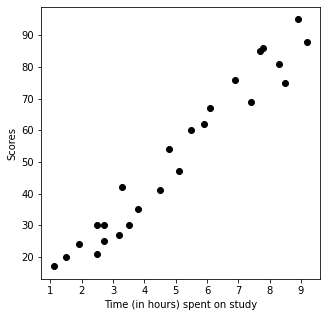

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(data['Hours'], data['Scores'], c='black')
plt.xlabel("Time (in hours) spent on study")
plt.ylabel("Scores")
plt.show()

# Model Fitting

In [6]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 2.4837 + 9.7758X


Here X co-oefficient is 9.7758 and Y intercept is 2.4837

### Let’s visualize how the line fits the data.

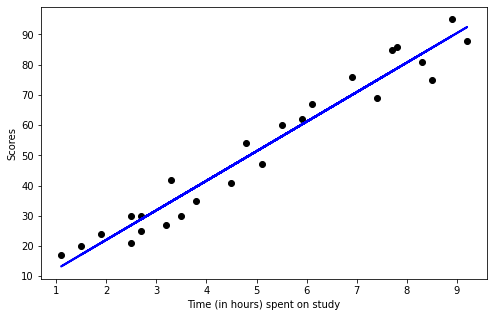

In [7]:
predictions = reg.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(data['Hours'],data['Scores'],c='black')
plt.plot(data['Hours'],predictions,c='blue',linewidth=2)
plt.xlabel("Time (in hours) spent on study")
plt.ylabel("Scores")
plt.show()

### Comparing actual score vs predicted score

In [8]:
data["Actual Score"] = data['Scores']
data['Predicted Score'] = predictions
data = data.drop(['Scores'], axis=1)
data.head(15)

,Hours,Actual Score,Predicted Score
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


### Evaluating model

In [9]:
print(reg.score(X, y)) 

0.9529481969048356


Accuracy of this model is 95.29% which indicates model is highly predictive.

# Making Predictions

In [10]:
# here x is the input variable which indicates the number of hours a student studied
x = 9.25
X = np.array(x).reshape(1,-1)
score = reg.predict(X)
print("After studying for "+ str(x) +" hours student will score " + str(score[0])+"%")

After studying for 9.25 hours student will score [92.90985477]%
